<a href="https://colab.research.google.com/github/AvantiShri/colab_notebooks/blob/master/misc_examples/SimulateImpScores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip uninstall -y modisco
%cd /content/
!rm -rf tfmodisco
!git clone https://github.com/kundajelab/tfmodisco.git
%cd /content/tfmodisco
!git checkout exposition
!git log -1
!pip install .
%cd /content/

from importlib import reload
%load_ext autoreload
%autoreload 2

import modisco
reload(modisco)

Found existing installation: modisco 0.5.15.0
Uninstalling modisco-0.5.15.0:
  Successfully uninstalled modisco-0.5.15.0
/content
Cloning into 'tfmodisco'...
remote: Enumerating objects: 5690, done.
remote: Counting objects: 100% (316/316), done.
remote: Compressing objects: 100% (217/217), done.
remote: Total 5690 (delta 205), reused 189 (delta 97), pack-reused 5374
Receiving objects: 100% (5690/5690), 229.79 MiB | 28.85 MiB/s, done.
Resolving deltas: 100% (3552/3552), done.
/content/tfmodisco
Branch 'exposition' set up to track remote branch 'exposition' from 'origin'.
Switched to a new branch 'exposition'
commit 762a5cc787d7dda8d230460e7b17368fb9d59ff6 (HEAD -> exposition, origin/exposition)
Author: Av Shrikumar <avanti.shrikumar@gmail.com>
Date:   Wed Oct 6 16:48:13 2021 -0700

    name fix
Processing /content/tfmodisco
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-featu

<module 'modisco' from '/usr/local/lib/python3.7/dist-packages/modisco/__init__.py'>

In [2]:
!pip uninstall -y simdna
%cd /content/
!rm -rf simdna
!git clone https://github.com/kundajelab/simdna.git
%cd /content/simdna
!git checkout dev
!git log -1
!pip install .
%cd /content/

from importlib import reload
%load_ext autoreload
%autoreload 2

Found existing installation: simdna 0.5.0.0
Uninstalling simdna-0.5.0.0:
  Successfully uninstalled simdna-0.5.0.0
/content
Cloning into 'simdna'...
remote: Enumerating objects: 1234, done.
remote: Counting objects: 100% (340/340), done.
remote: Compressing objects: 100% (241/241), done.
remote: Total 1234 (delta 167), reused 236 (delta 99), pack-reused 894
Receiving objects: 100% (1234/1234), 4.02 MiB | 21.65 MiB/s, done.
Resolving deltas: 100% (695/695), done.
/content/simdna
Branch 'dev' set up to track remote branch 'dev' from 'origin'.
Switched to a new branch 'dev'
commit e8488eba5eae123bc798bcbbdbc580497352608b (HEAD -> dev, origin/dev)
Author: Av Shrikumar <avanti.shrikumar@gmail.com>
Date:   Wed Sep 29 17:20:03 2021 -0700

    super fix
Processing /content/simdna
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new 

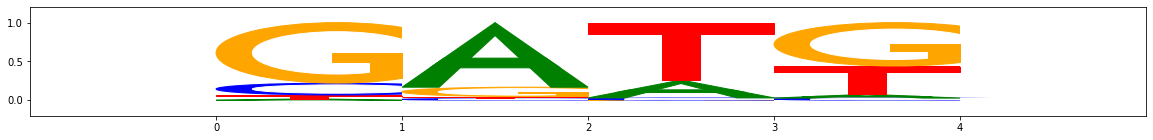

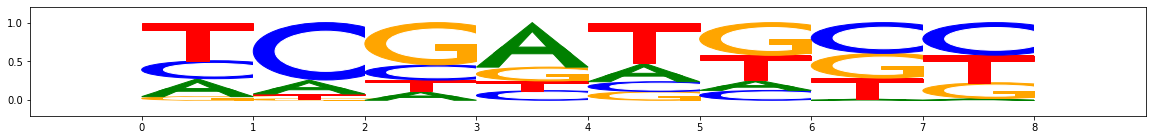

In [168]:
#motifs of varying lengths
#and of varying frequencies

import numpy as np
import modisco
from modisco.visualization import viz_sequence

rng = np.random.RandomState(1234)

def generate_ppm(rng, length, alpha):
    return rng.dirichlet(alpha*np.ones(4), size=length)

def gen_motif_with_diff_flanks(rng, core_len, core_alpha,
                                    flank_len, flank_alpha):
  motifcore = generate_ppm(rng, length=core_len, alpha=0.5)
  motifa = np.concatenate([
              generate_ppm(rng, length=flank_len, alpha=flank_alpha),
                motifcore,
              generate_ppm(rng, length=flank_len, alpha=flank_alpha)])
  motifb = np.concatenate([
              generate_ppm(rng, length=flank_len, alpha=flank_alpha),
                motifcore,
              generate_ppm(rng, length=flank_len, alpha=flank_alpha)])
  return motifa, motifb

def gen_motif_with_lower_ic_and_diff_flanks(rng, core_len, core_alpha, flank_len,
                                            flank_alpha, core_pc):
  motif_core = generate_ppm(rng, length=core_len, alpha=core_alpha)
  degraded_core = (motif_core +
                   np.array([core_pc, core_pc,
                             core_pc, core_pc])[None,:])/(1.0 + core_pc*4)
  motifa = np.concatenate([
              generate_ppm(rng, length=flank_len, alpha=flank_alpha),
                degraded_core,
              generate_ppm(rng, length=flank_len, alpha=flank_alpha)])
  return motif_core, motifa

#motif1a, motif1b = gen_motif_with_diff_flanks(
#                      rng=rng, core_len=5,
#                      core_alpha=0.5, flank_len=3, flank_alpha=2.0)
#viz_sequence.plot_weights(motif1a)
#viz_sequence.plot_weights(motif1b)


motif2a, motif2b = gen_motif_with_lower_ic_and_diff_flanks(
                      rng=rng, core_len=4,
                      core_alpha=0.4, flank_len=2, flank_alpha=1.0,
                      core_pc=0.2) #core_pc is 'core_pseudocount'

viz_sequence.plot_weights(motif2a, figsize=())
viz_sequence.plot_weights(motif2b)

"""motif3 = np.concatenate([generate_ppm(rng, length=3, alpha=2.0),
                         generate_ppm(rng, length=9, alpha=0.5),
                         generate_ppm(rng, length=3, alpha=2.0)])
viz_sequence.plot_weights(motif3)

motif4 = np.concatenate([generate_ppm(rng, length=2, alpha=2.0),
                         generate_ppm(rng, length=11, alpha=0.7),
                         generate_ppm(rng, length=2, alpha=2.0)])
viz_sequence.plot_weights(motif4)

motif5 = np.concatenate([generate_ppm(rng, length=1, alpha=2.0),
                         generate_ppm(rng, length=13, alpha=0.7),
                         generate_ppm(rng, length=1, alpha=2.0)])
viz_sequence.plot_weights(motif5)

motif6 = np.concatenate([generate_ppm(rng, length=5, alpha=0.5),
                         generate_ppm(rng, length=5, alpha=2.0),
                         generate_ppm(rng, length=5, alpha=0.5)])
viz_sequence.plot_weights(motif6)"""


motifs = [motif2a, motif2b]
#motifs = [motif1a, motif1b, motif2a, motif2b]#, motif3, motif4, motif5, motif6]

In [169]:
#generate simulate sequences
from importlib import reload
import simdna
reload(simdna.synthetic.substringgen)
#reload(simdna.synthetic.embedders)
from simdna.simdnautil.pwm import PWM
import simdna.synthetic as sn
import simdna

"""rng = np.random.RandomState(1234)

simdnapwmembedders = [sn.SubstringEmbedder(sn.PwmSampler(
                       PWM(name="motif"+str(idx),probMatrix=motif,
                           pseudocountProb=0.0)),
                           positionGenerator=sn.InsideCentralBp(centralBp=50))
                      for idx,motif in enumerate(motifs)]
relative_probs = rng.dirichlet(alpha=np.ones(len(motifs))*5)
print("Motif relative probs:", relative_probs)
embedder = sn.RandomSubsetOfEmbedders(
              quantityGenerator=min(3, len(motifs)), embedders=simdnapwmembedders,
              probs=relative_probs)
simulator = sn.EmbedInABackground(
    backgroundGenerator=sn.ZeroOrderBackgroundGenerator(
        seqLength=100,
        discreteDistribution={'A':0.27, 'C':0.23, 'G':0.23, 'T': 0.27}),
        embedders=[embedder])

sn.print_sequences(
    outputFileName="mysim.simdna",
    sequenceSetGenerator=sn.GenerateSequenceNTimes(simulator, N=1000),
    includeEmbeddings=True)"""

bgsimulator = sn.EmbedInABackground(
    backgroundGenerator=sn.ZeroOrderBackgroundGenerator(
        seqLength=100,
        discreteDistribution={'A':0.27, 'C':0.23, 'G':0.23, 'T': 0.27}),
        embedders=[])

sn.print_sequences(
    outputFileName="bgsim1.simdna",
    sequenceSetGenerator=sn.GenerateSequenceNTimes(bgsimulator, N=1000),
    includeEmbeddings=True)

sn.print_sequences(
    outputFileName="bgsim2.simdna",
    sequenceSetGenerator=sn.GenerateSequenceNTimes(bgsimulator, N=100),
    includeEmbeddings=True)

In [170]:
#simdata = sn.read_simdata_file("mysim.simdna")
#bgdata = sn.read_simdata_file("bgsim.simdna")

bgdata1 = sn.read_simdata_file("bgsim1.simdna")
bgdata2 = sn.read_simdata_file("bgsim2.simdna")

In [171]:
seqs = simdata.sequences

#one-hot encode the seqs
import numpy as np
lookup = {'A': [1,0,0,0], 'C': [0,1,0,0], 'G': [0,0,1,0], 'T': [0,0,0,1]}
def onehotencode_seqs(seqs):
  to_return = []
  for seq in seqs:
    to_return.append([lookup[letter] for letter in seq])
  return np.array(to_return)

#fg_onehot_seqs = onehotencode_seqs(simdata.sequences)
#bg_onehot_seqs = onehotencode_seqs(bgdata.sequences)

bg1_onehot_seqs = onehotencode_seqs(bgdata1.sequences)
bg2_onehot_seqs = onehotencode_seqs(bgdata2.sequences)

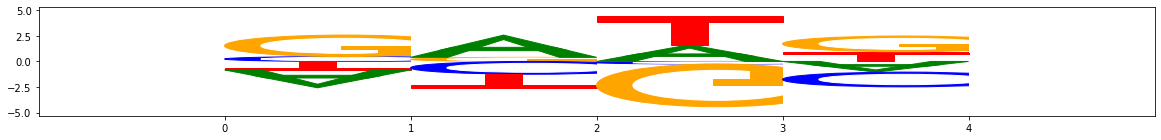

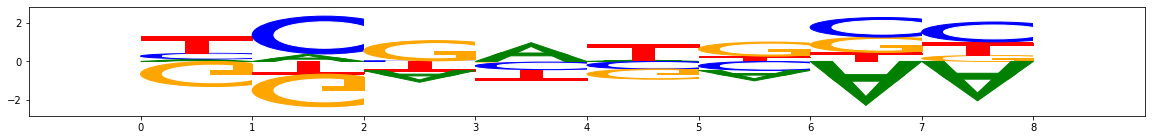

In [172]:
#score each sequence with the log-odds matrix of each pfm
background = np.array([0.27, 0.23, 0.23, 0.27])
pwms = [np.log(motif/background) for motif in motifs]
for pwm in pwms:
  viz_sequence.plot_weights(pwm - np.mean(pwm, axis=-1)[:,None])

In [173]:
#scan each sequence with the rolling window sums. 
import modisco
import numpy as np
import scipy
from collections import namedtuple


PwmHit = namedtuple("PwmHit", ["seq_idx", "pwm_start", "pwm_end", "which_pwm",
                                         "logodds_score"])


def get_pwm_hits_for_seq(seq_pwm_axis_argmax, seq_pwm_axis_maxlogodds,
                         pwm_offsets, pwm_lengths, competition_window,
                         seq_idx):
    #Greedily decide which motifs get to bind
    #Pwm offsets should be the left padding that was applied to the logodds
    # scores for that particular pwm (depends on the pwm length)
    #seq_idx just to insert into the hit
    maxlogodds_copy = np.copy(seq_pwm_axis_maxlogodds)
    sorted_positions = np.argsort(-maxlogodds_copy)
    
    pwm_hits = []
    for pos in sorted_positions:
        logodds_score = maxlogodds_copy[pos]
        if (logodds_score <= 0): #avoid 'less likely than bg' hits for this sim
            continue
        which_pwm = seq_pwm_axis_argmax[pos]
        #we want pwm_hits to represent the pwm start, hence the subtraction
        # of pwm_offsets
        pwm_start = pos-pwm_offsets[which_pwm]
        pwm_hits.append(PwmHit(seq_idx=seq_idx,
                               pwm_start=pwm_start,
                               pwm_end=pwm_start+pwm_lengths[which_pwm],
                               which_pwm=which_pwm,
                               logodds_score=logodds_score))
        clearance_start = pos - int(competition_window/2.0)
        clearance_end = clearance_start + competition_window
        maxlogodds_copy[clearance_start:clearance_end] = 0
    return pwm_hits


def scan_sequences(onehot_seqs, pwms):
  logodds_scans = []
  #pwm_scans = []
  for pwm in pwms:
    logodds_scans.append(modisco.util.compute_pwm_scan(onehot_seq=onehot_seqs,
                                                       weightmat=pwm))
    #pwm_scans.append( np.exp(expfactor*scipy.special.expit(logodds_scans[-1]+mu)) )
  return logodds_scans#, pwm_scans


def get_competitive_pwm_hits(onehot_seqs, pwms, competition_window):
    #Scan the sequences for logodds. Then:
    # (1) simulate competitive binding, in that only one motif is allowed to bind
    # in a window of length "competition_window" (centered at the motif)
    # (2) Decide which motif gets to bind greedily.
    
    logodds_scans = scan_sequences(onehot_seqs=onehot_seqs, pwms=pwms)
    pwm_lengths = [len(x) for x in pwms]

    #When a sequences is scanned,
    # the length of the result is orig_len-(windowlen-1). So we distribute
    # (windowlen-1) evenly on either side to make up for it.
    padded_logodds_scans = []
    pwm_offsets = [] #record the left-padding applied
    for (logodds_scan, pwm_len) in zip(logodds_scans, pwm_lengths):
      pwm_offset = int((pwm_len-1)/2.0)
      pwm_offsets.append(pwm_offset)
      padded_logodds_scans.append(
          np.pad(np.array(logodds_scan), (
            (0,0), (pwm_offset, (pwm_len-1)-pwm_offset )))
      )
    #assert that after padding they are all the same length. This will also make
    # the scores represent the score at the center of the pwm hit rather than
    # at the start.
    assert len(set(x.shape[1] for x in padded_logodds_scans)) == 1
    #make them all one numpy array so we can take an argmax over the pwm axis
    padded_logodds_scans = np.array(padded_logodds_scans)
    pwm_axis_argmax = np.argmax(padded_logodds_scans, axis=0)
    pwm_axis_maxlogodds = np.max(padded_logodds_scans, axis=0)
    allseq_pwm_hits = [
      get_pwm_hits_for_seq(seq_pwm_axis_argmax, seq_pwm_axis_maxlogodds,
                           pwm_offsets=pwm_offsets, pwm_lengths=pwm_lengths,
                           competition_window=competition_window,
                           seq_idx=seq_idx)
      for (seq_idx, (seq_pwm_axis_argmax, seq_pwm_axis_maxlogodds)) in
      enumerate(zip(pwm_axis_argmax, pwm_axis_maxlogodds))
    ]

    #reorganize to be pwm-to-hits
    pwm_to_hits = [[] for pwm in pwms]
    for seq_idx, pwm_hits_for_seq in enumerate(allseq_pwm_hits):
      for pwm_hit in pwm_hits_for_seq:
        pwm_to_hits[pwm_hit.which_pwm].append(pwm_hit)

    return allseq_pwm_hits, pwm_to_hits


COMPETITION_WINDOW = max([len(x) for x in pwms])

#(fg_allseq_pwm_hits, fg_pwm_to_hits) = get_competitive_pwm_hits(
#    onehot_seqs=fg_onehot_seqs, pwms=pwms,
#    competition_window=COMPETITION_WINDOW)
(bg1_allseq_pwm_hits, bg1_pwm_to_hits) = get_competitive_pwm_hits(
    onehot_seqs=bg1_onehot_seqs, pwms=pwms,
    competition_window=COMPETITION_WINDOW)
(bg2_allseq_pwm_hits, bg2_pwm_to_hits) = get_competitive_pwm_hits(
    onehot_seqs=bg2_onehot_seqs, pwms=pwms,
    competition_window=COMPETITION_WINDOW)

#print("sumscore hits in fg")
#print([np.sum([y.logodds_score for y in x]) for x in fg_pwm_to_hits])

print("sumscore hits in bg1")
print([np.sum([y.logodds_score for y in x]) for x in bg1_pwm_to_hits])

print("sumscore hits in bg2")
print([np.sum([y.logodds_score for y in x]) for x in bg2_pwm_to_hits])

#for logodds_scan in fg_logodds_scans:
#  print(np.sum(logodds_scan+mu > 0)) #instances of "positive" hits
#print("hits in bg")
#for logodds_scan in bg_logodds_scans:
#  print(np.sum(logodds_scan+mu > 0)) #instances of "positive" hits

sumscore hits in bg1
[9966.515083281027, 10720.108062429807]
sumscore hits in bg2
[932.5206439022518, 1136.567206561228]


In [174]:

def logodds_to_score(logodds):
  MU = -4
  EXPFACTOR = 3
  #return logodds
  #return scipy.special.expit(logodds+MU)
  return np.exp(EXPFACTOR*scipy.special.expit(logodds+MU))

def find_imp(onehot_seqs, allseq_pwm_hits, pwms):
    ref = logodds_to_score(0)
    simulated_hyp_scores = np.zeros_like(onehot_seqs, dtype="float64")
    for row_idx in range(len(allseq_pwm_hits)):
      for pwm_hit in allseq_pwm_hits[row_idx]:
        assert pwm_hit.seq_idx==row_idx
        score = logodds_to_score(pwm_hit.logodds_score)
        diff_from_ref = score-ref
        assert np.sign(diff_from_ref)==np.sign(pwm_hit.logodds_score)
        scalefactor = diff_from_ref/pwm_hit.logodds_score
        simulated_hyp_scores[row_idx][
            pwm_hit.pwm_start:pwm_hit.pwm_end]\
                += pwms[pwm_hit.which_pwm]*scalefactor
    simulated_actual_scores = simulated_hyp_scores*onehot_seqs
    return simulated_hyp_scores, simulated_actual_scores

"""fg_hyp_scores, fg_actual_scores = find_imp(onehot_seqs=fg_onehot_seqs,
                                           allseq_pwm_hits=fg_allseq_pwm_hits,
                                           pwms=pwms)"""

bg1_hyp_scores, bg1_actual_scores = find_imp(onehot_seqs=bg1_onehot_seqs,
                                           allseq_pwm_hits=bg1_allseq_pwm_hits,
                                           pwms=pwms)

bg2_hyp_scores, bg2_actual_scores = find_imp(onehot_seqs=bg2_onehot_seqs,
                                           allseq_pwm_hits=bg2_allseq_pwm_hits,
                                           pwms=pwms)

bg


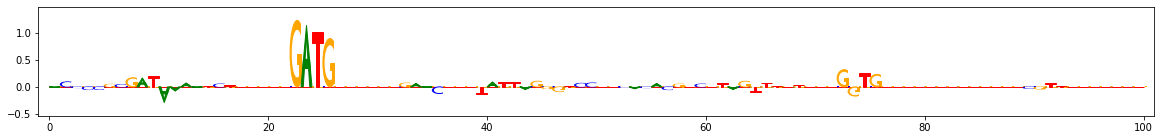

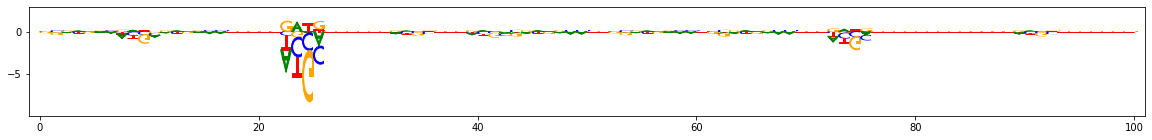

bg


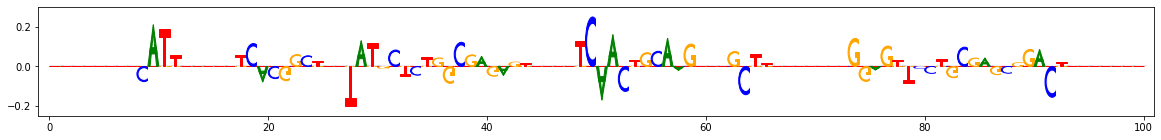

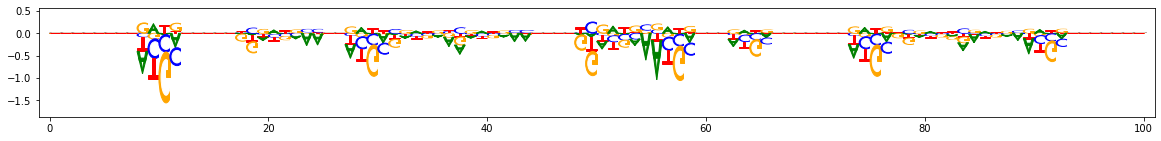

In [175]:
from modisco.visualization import viz_sequence

for i in range(2):
  print("bg")
  viz_sequence.plot_weights(bg1_actual_scores[i], subticks_frequency=20)
  viz_sequence.plot_weights(bg1_hyp_scores[i], subticks_frequency=20)
  #print("bg")
  #viz_sequence.plot_weights(bg_actual_scores[i], subticks_frequency=20)
  #viz_sequence.plot_weights(bg_hyp_scores[i], subticks_frequency=20)

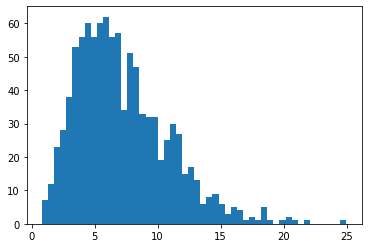

In [176]:
from matplotlib import pyplot as plt
plt.hist(np.sum(bg1_actual_scores, axis=(1,2)), bins=50)
plt.show()

In [177]:
%tensorflow_version 1.x

In [178]:
import keras

In [189]:

import numpy as np
np.random.seed(1234)
import tensorflow as tf
tf.set_random_seed(1234)

model = keras.models.Sequential()
NUM_FILT = 10
model.add(keras.layers.Conv1D(filters=NUM_FILT, kernel_size=10,
                              strides=1, padding='same', input_shape=(100,4)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Conv1D(filters=NUM_FILT, kernel_size=5,
                              strides=1, padding='same'))
model.add(keras.layers.Activation('sigmoid'))
model.add(keras.layers.Conv1D(filters=NUM_FILT, kernel_size=1,
                              strides=1, padding='same'))
model.add(keras.layers.Activation('exponential'))
model.add(keras.layers.Permute((1,2))) #take the best motif hit per position
model.add(keras.layers.MaxPool1D(pool_size=NUM_FILT))
model.add(keras.layers.Permute((1,2)))
#model.add(keras.layers.Activation('sigmoid'))
#model.add(keras.layers.Conv1D(filters=NUM_FILT, kernel_size=1,
#                                    strides=1, padding='same'))
#model.add(keras.layers.Conv1D(filters=1, kernel_size=1,
#                                    strides=1, padding='same'))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(1))
model.add(keras.layers.Activation('linear'))

model.compile(optimizer='adam', loss='mse')
model.fit(x=bg1_onehot_seqs, y=np.sum(bg1_actual_scores, axis=(1,2)),
          epochs=1000,
          validation_data=(bg2_onehot_seqs, np.sum(bg2_actual_scores, axis=(1,2))),
          callbacks=[keras.callbacks.EarlyStopping(restore_best_weights=True, patience=30)])

Train on 1000 samples, validate on 100 samples
Epoch 1/1000
1000/1000 [==============================] - 2s 2ms/step - loss: 13.8480 - val_loss: 12.1467
Epoch 2/1000
1000/1000 [==============================] - 0s 323us/step - loss: 13.0699 - val_loss: 12.2507
Epoch 3/1000
1000/1000 [==============================] - 0s 326us/step - loss: 12.9919 - val_loss: 11.9966
Epoch 4/1000
1000/1000 [==============================] - 0s 324us/step - loss: 12.9184 - val_loss: 11.9234
Epoch 5/1000
1000/1000 [==============================] - 0s 335us/step - loss: 12.8119 - val_loss: 11.9453
Epoch 6/1000
1000/1000 [==============================] - 0s 322us/step - loss: 12.6552 - val_loss: 11.7574
Epoch 7/1000
1000/1000 [==============================] - 0s 336us/step - loss: 12.5410 - val_loss: 11.7031
Epoch 8/1000
1000/1000 [==============================] - 0s 337us/step - loss: 12.3644 - val_loss: 11.5006
Epoch 9/1000
1000/1000 [==============================] - 0s 337us/step - loss: 12.1649 - v

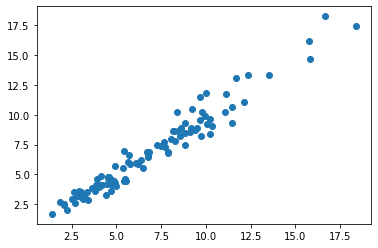

In [190]:
plt.scatter(np.sum(bg2_actual_scores, axis=(1,2)), model.predict(bg2_onehot_seqs))
plt.show()

In [148]:
!git clone https://github.com/AvantiShri/shap.git
%cd /content/shap
!pip uninstall shap
!git pull
!pip install .
%cd /content

Cloning into 'shap'...
remote: Enumerating objects: 4893, done.
remote: Total 4893 (delta 0), reused 0 (delta 0), pack-reused 4893
Receiving objects: 100% (4893/4893), 112.56 MiB | 27.94 MiB/s, done.
Resolving deltas: 100% (3196/3196), done.
Checking out files: 100% (260/260), done.
/content/shap
Already up to date.
Processing /content/shap
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for shap: filename=shap-0.29.3-cp37-cp37m-linux_x86_64.whl size=348867 sha256=7a49f36df8dd42f1f663ad213d8e08e8d201e3cd4f3a34d7f3272e87e0ec0884
  Stored in directory: /tmp/pip-ephem-wheel-cache-zt4_ss5x/wheels/ea/b3/a2/87ca0dc4b2280b7a7cae118affe

In [191]:
!pip install deeplift

from deeplift.dinuc_shuffle import dinuc_shuffle
import numpy as np

def dinuc_shuffle_several_times(list_containing_input_modes_for_an_example,
                                seed=1234):
  assert len(list_containing_input_modes_for_an_example)==1
  onehot_seq = list_containing_input_modes_for_an_example[0]
  rng = np.random.RandomState(seed)
  to_return = np.array([dinuc_shuffle(onehot_seq, rng=rng) for i in range(10)])
  return [to_return] #wrap in list for compatibility with multiple modes

In [192]:
import shap

def combine_mult_and_diffref(mult, orig_inp, bg_data):
    assert len(orig_inp)==1
    projected_hypothetical_contribs = np.zeros_like(bg_data[0]).astype("float")
    assert len(orig_inp[0].shape)==2
    #At each position in the input sequence, we iterate over the one-hot encoding
    # possibilities (eg: for genomic sequence, this is ACGT i.e.
    # 1000, 0100, 0010 and 0001) and compute the hypothetical 
    # difference-from-reference in each case. We then multiply the hypothetical
    # differences-from-reference with the multipliers to get the hypothetical contributions.
    #For each of the one-hot encoding possibilities,
    # the hypothetical contributions are then summed across the ACGT axis to estimate
    # the total hypothetical contribution of each position. This per-position hypothetical
    # contribution is then assigned ("projected") onto whichever base was present in the
    # hypothetical sequence.
    #The reason this is a fast estimate of what the importance scores *would* look
    # like if different bases were present in the underlying sequence is that
    # the multipliers are computed once using the original sequence, and are not
    # computed again for each hypothetical sequence.
    for i in range(orig_inp[0].shape[-1]):
        hypothetical_input = np.zeros_like(orig_inp[0]).astype("float")
        hypothetical_input[:,i] = 1.0
        hypothetical_difference_from_reference = (hypothetical_input[None,:,:]-bg_data[0])
        hypothetical_contribs = hypothetical_difference_from_reference*mult[0]
        projected_hypothetical_contribs[:,:,i] = np.sum(hypothetical_contribs,axis=-1) 
    return [np.mean(projected_hypothetical_contribs,axis=0)]


explainer = shap.DeepExplainer(model=([model.input],
    model.layers[-2].output[:,0]), data=dinuc_shuffle_several_times,
    combine_mult_and_diffref=combine_mult_and_diffref)
bg2_deepshap_hyp_scores = explainer.shap_values(bg2_onehot_seqs)

In [193]:
bg2_deepshap_actual_scores = bg2_deepshap_hyp_scores*bg2_onehot_seqs

true


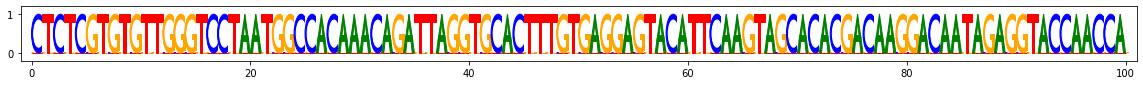

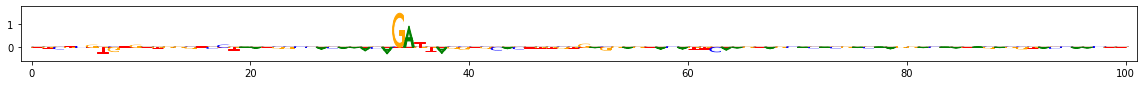

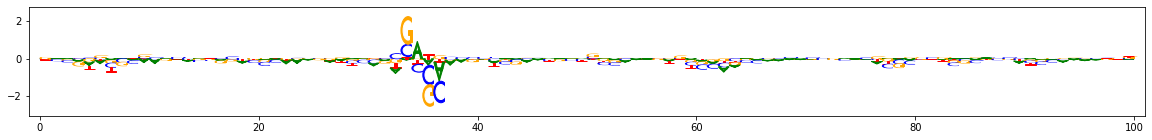

true


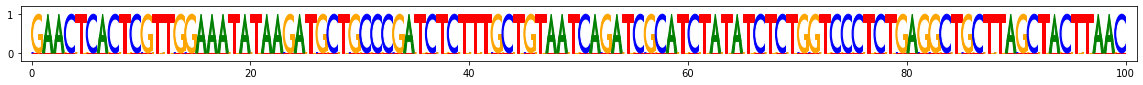

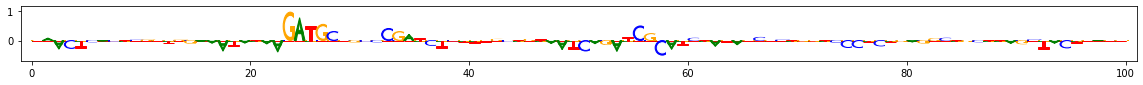

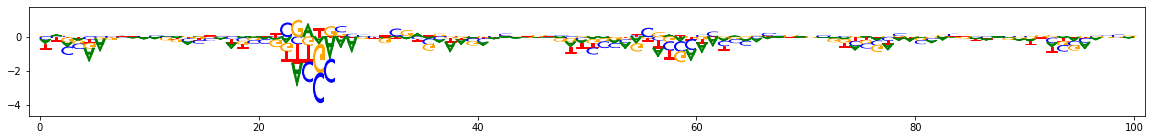

true


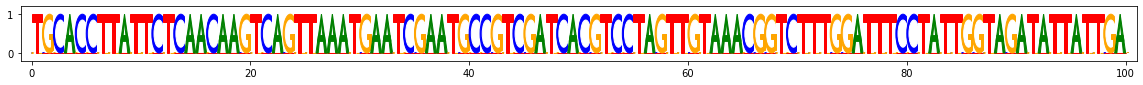

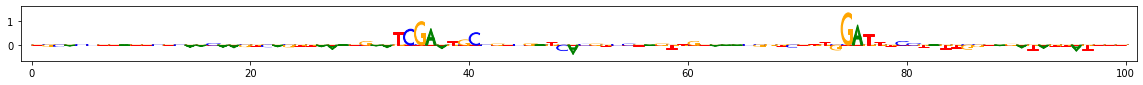

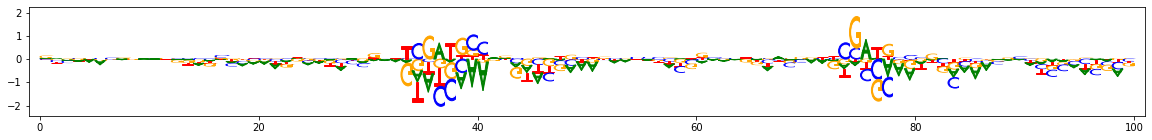

true


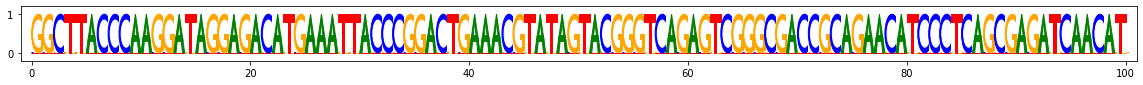

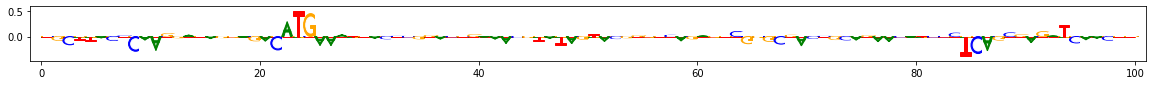

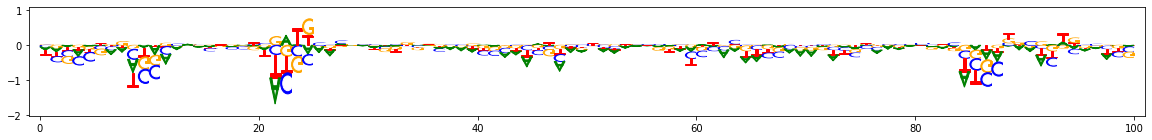

true


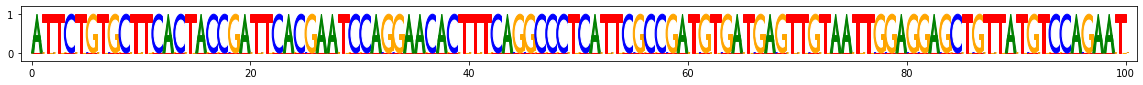

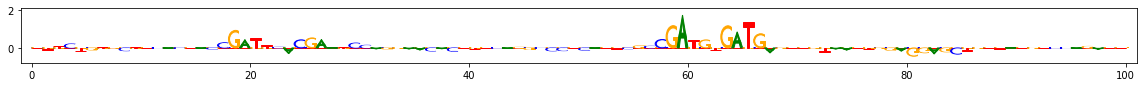

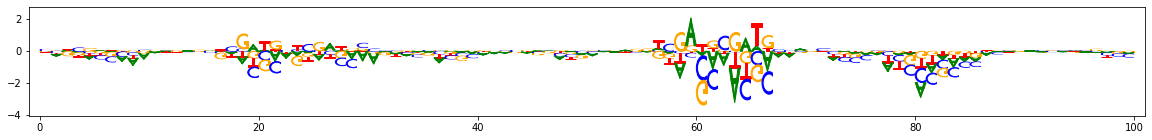

true


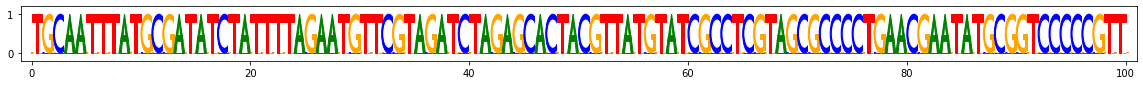

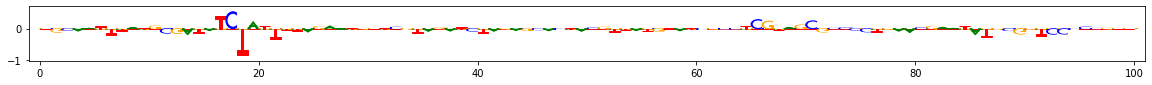

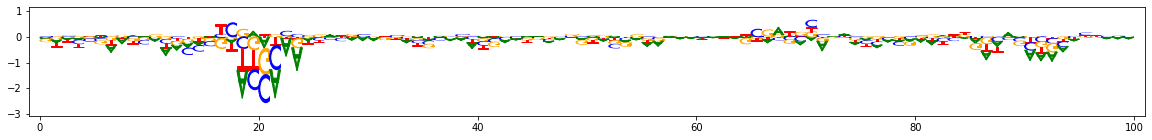

true


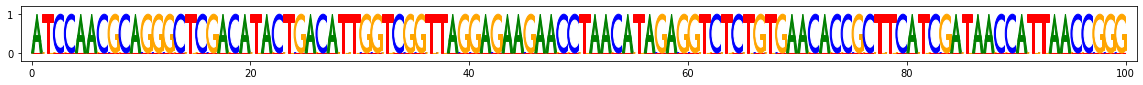

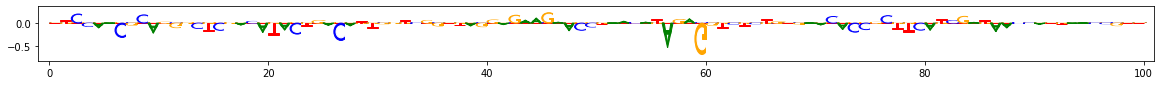

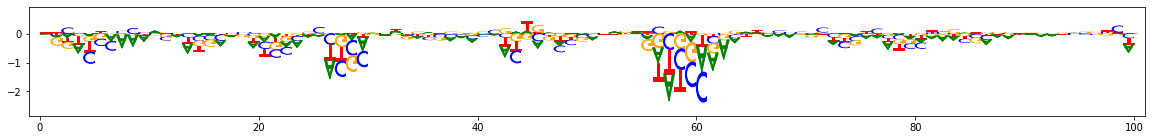

true


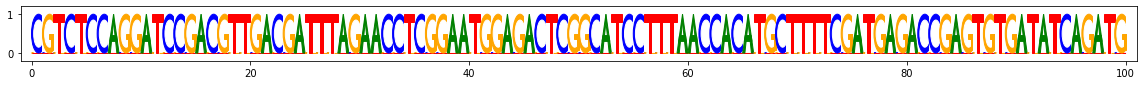

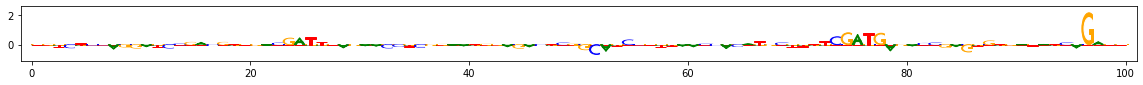

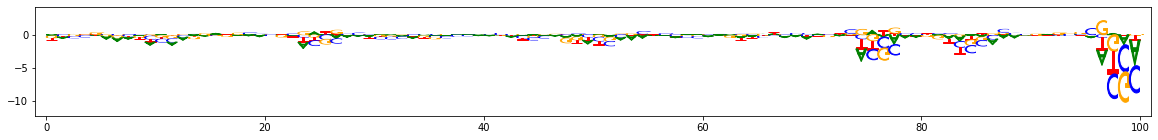

true


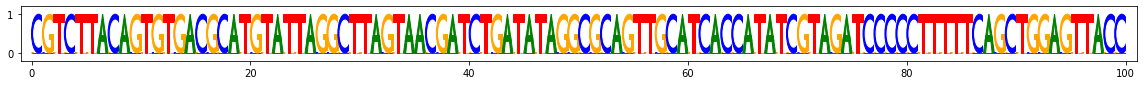

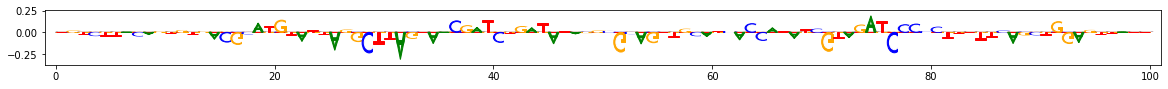

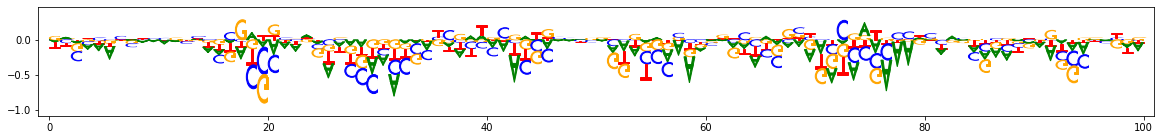

true


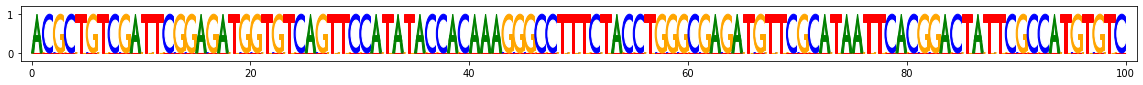

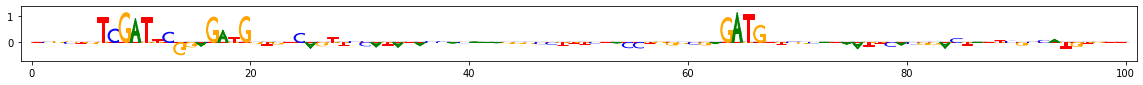

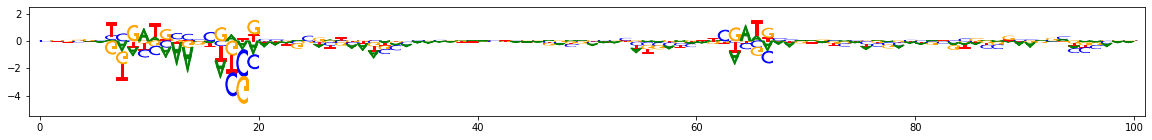

true


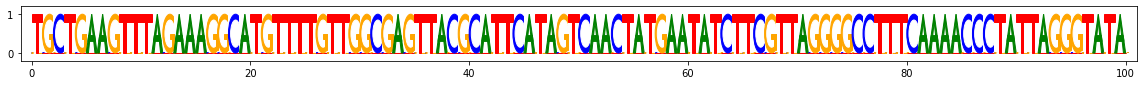

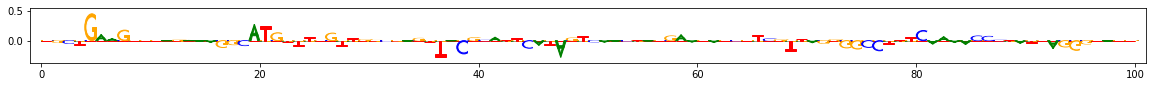

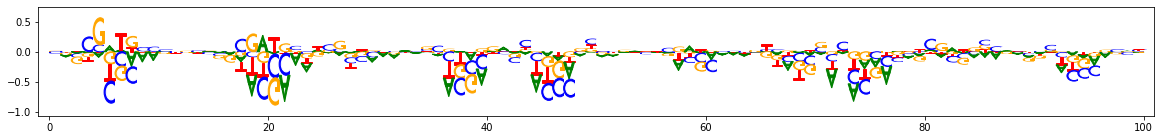

true


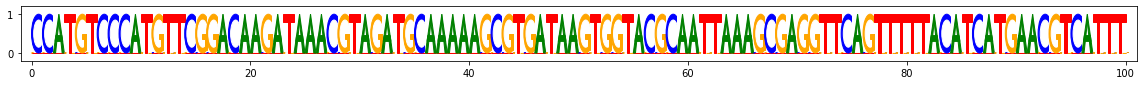

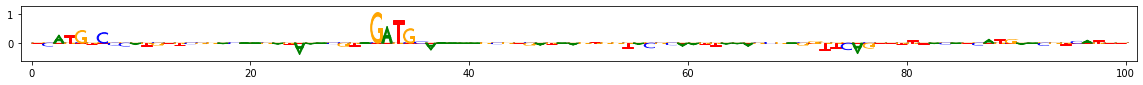

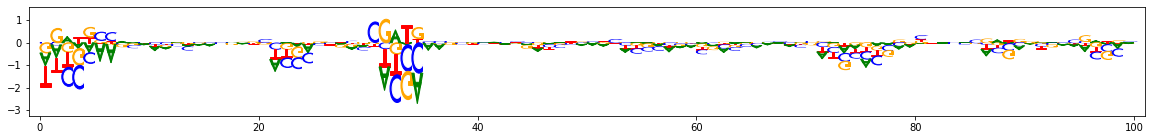

true


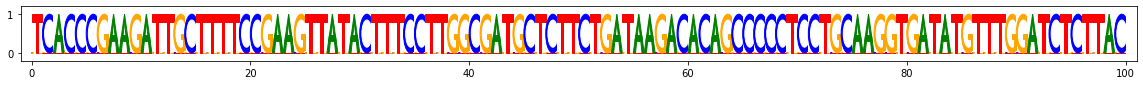

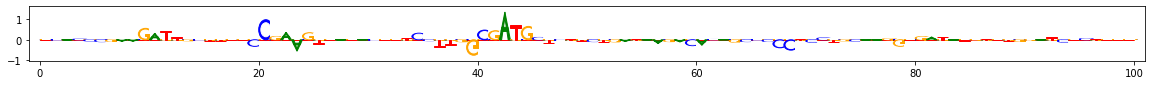

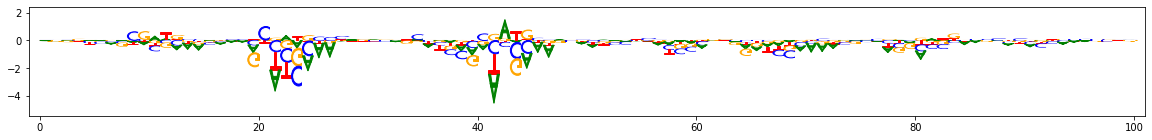

true


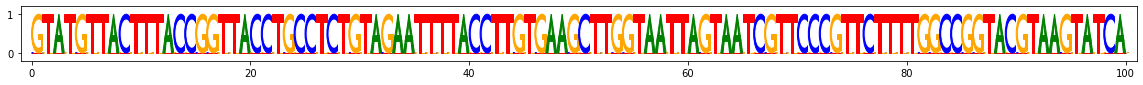

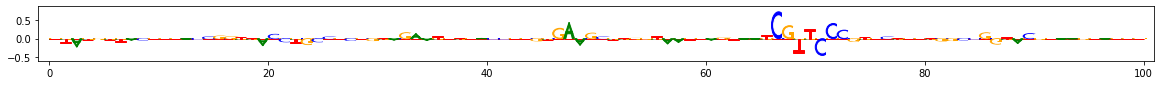

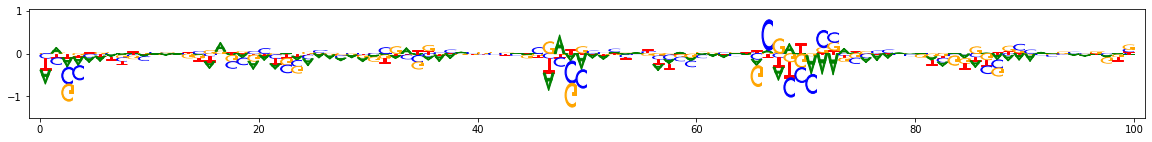

true


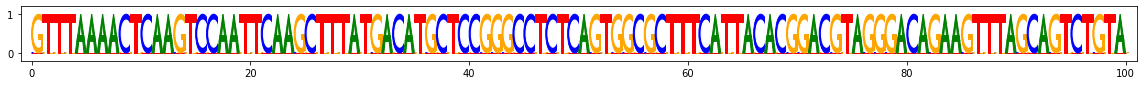

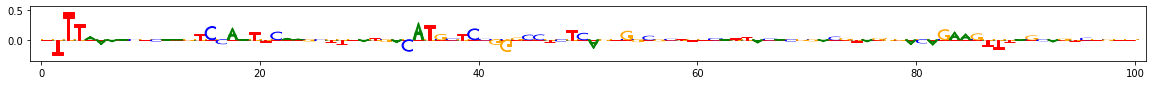

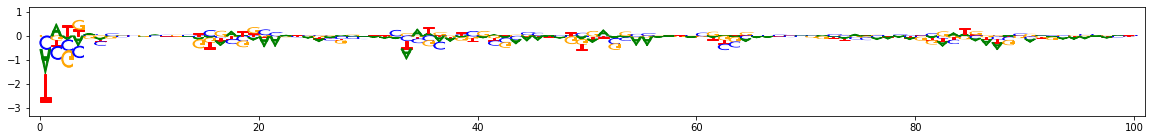

true


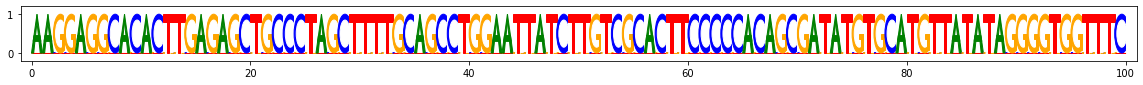

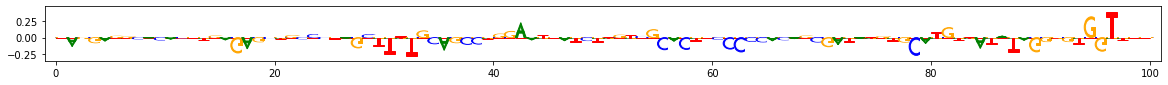

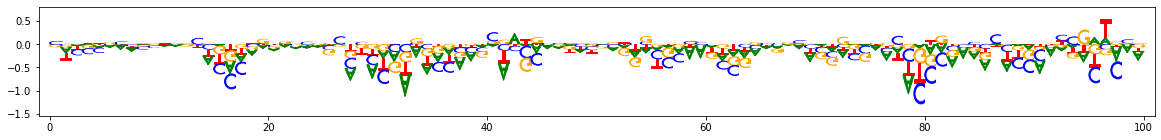

true


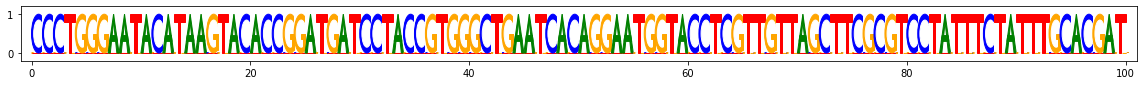

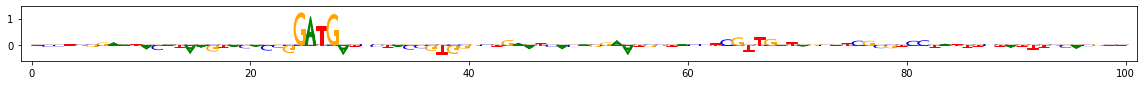

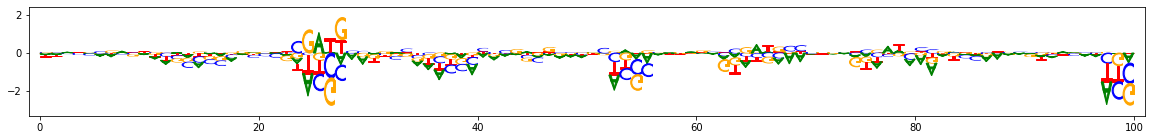

true


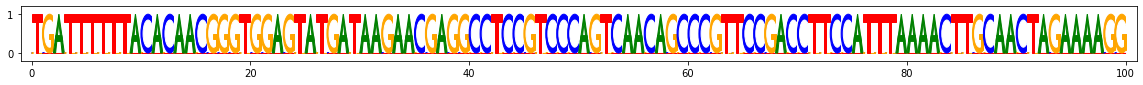

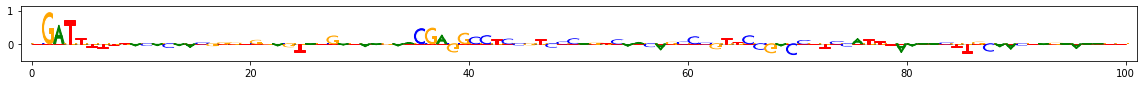

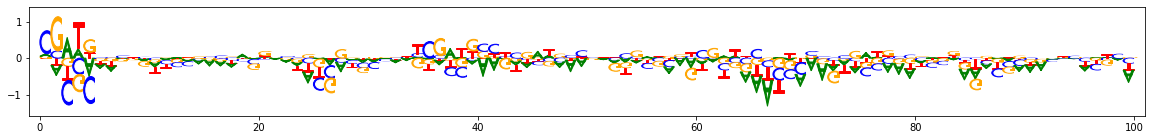

true


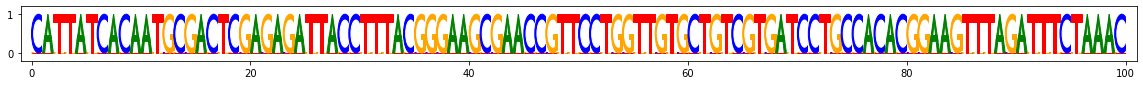

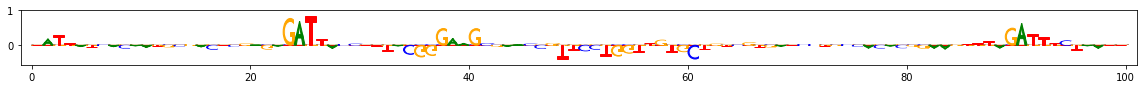

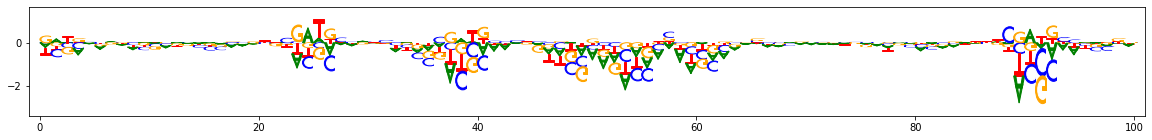

true


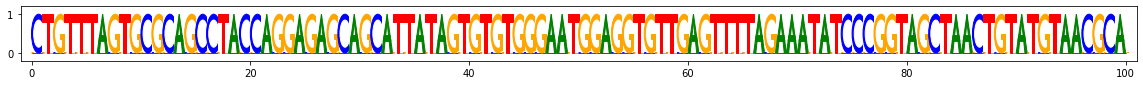

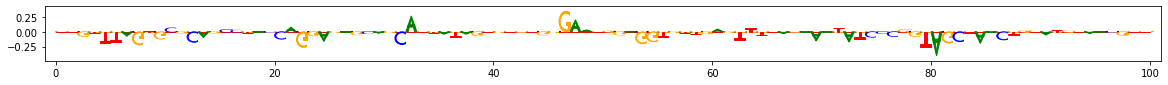

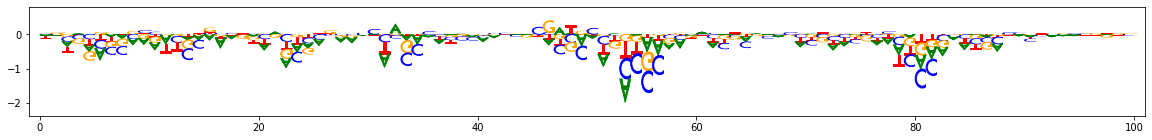

In [251]:
from modisco.visualization import viz_sequence

for i in range(20):
  print("true")
  viz_sequence.plot_weights(bg2_onehot_seqs[i], subticks_frequency=20, figsize=(20,1))
  #viz_sequence.plot_weights(bg2_actual_scores[i], subticks_frequency=20)
  #viz_sequence.plot_weights(bg2_hyp_scores[i], subticks_frequency=20)
  #print("deepshap")
  viz_sequence.plot_weights(bg2_deepshap_actual_scores[i], subticks_frequency=20, figsize=(20,1))
  viz_sequence.plot_weights(bg2_deepshap_hyp_scores[i], subticks_frequency=20)
  #print("bg")
  #viz_sequence.plot_weights(bg_actual_scores[i], subticks_frequency=20)
  #viz_sequence.plot_weights(bg_hyp_scores[i], subticks_frequency=20)

MEMORY 2.223013888
On task task0
Computing windowed sums on original
Generating null dist
peak(mu)= -0.11765915511020596
Computing threshold
For increasing = True , the minimum IR precision was 0.0 occurring at 4.966587119496768e-05 implying a frac_neg of 1.00000010000001e-07
To be conservative, adjusted frac neg is 0.95
For increasing = False , the minimum IR precision was 0.0 occurring at -7.056126680493602e-05 implying a frac_neg of 1.00000010000001e-07
To be conservative, adjusted frac neg is 0.95
Thresholds from null dist were -2.1067319761321412  and  1.4557197688060113 with frac passing 0.0731868131868132
Final raw thresholds are -2.1067319761321412  and  1.4557197688060113
Final transformed thresholds are -0.9502197802197803  and  0.9171428571428571


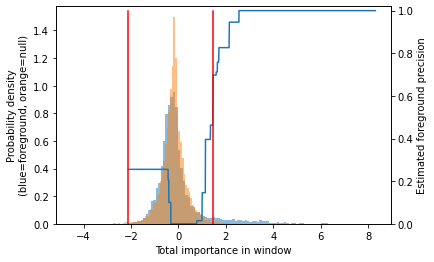

Got 134 coords
After resolving overlaps, got 134 seqlets
Across all tasks, the weakest transformed threshold used was: 0.9170428571428572
MEMORY 2.223013888
134 identified in total
1 activity patterns with support >= 100 out of 2 possible patterns
Metacluster sizes:  [133]
Idx to activities:  {0: '1'}
MEMORY 2.223013888
On metacluster 0
Metacluster size 133
Relevant tasks:  ('task0',)
Relevant signs:  (1,)
TfModiscoSeqletsToPatternsFactory: seed=1234
(Round 1) num seqlets: 133
(Round 1) Computing coarse affmat
MEMORY 2.223013888
Beginning embedding computation
MEMORY 2.223013888


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    1.5s
[Parallel(n_jobs=10)]: Done 133 out of 133 | elapsed:    5.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 133 out of 133 | elapsed:    0.5s finished


Constructing csr matrix...
csr matrix made in 0.03742527961730957 s
Finished embedding computation in 5.96 s
MEMORY 2.223013888
Starting affinity matrix computations
MEMORY 2.223013888
Batching in slices of size 133


100%|██████████| 1/1 [00:00<00:00,  1.54it/s]

Finished affinity matrix computations in 0.68 s
MEMORY 2.223013888


(Round 1) Computed coarse affmat
MEMORY 2.223013888
(Round 1) Computing affinity matrix on nearest neighbors
MEMORY 2.223013888
Launching nearest neighbors affmat calculation job
MEMORY 2.223013888
Parallel runs completed
MEMORY 2.22294016
Job completed in: 0.71 s
MEMORY 2.22294016
(Round 1) Computed affinity matrix on nearest neighbors in 1.06 s
MEMORY 2.223013888
Filtered down to 130 of 133
(Round 1) Retained 130 rows out of 133 after filtering
MEMORY 2.223013888
(Round 1) Computing density adapted affmat
MEMORY 2.223013888
Symmetrizing nearest neighbors
Computing betas for density adaptation
Computing normalizing denominators
(Round 1) Computing clustering
MEMORY 2.223013888
Beginning preprocessing + Leiden
Affmat shape: 130


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    8.2s


Quality: 0.11698280304561405
Got 3 clusters after round 1
Counts:
{2: 1, 1: 62, 0: 67}
MEMORY 2.223013888
(Round 1) Aggregating seqlets in each cluster
MEMORY 2.223013888
Aggregating for cluster 0 with 67 seqlets
MEMORY 2.223013888
Skipped 1 seqlets that went over the sequence edge during flank expansion
Skipped 2 seqlets that went over the sequence edge during flank expansion
Skipped 6 seqlets that went over sequence edge during flank expansion
Skipped 1 due to duplicates
Trimming eliminated 0 seqlets out of 57
Skipped 3 seqlets that went over the sequence edge during flank expansion
Aggregating for cluster 1 with 62 seqlets
MEMORY 2.223013888
Skipped 2 seqlets that went over the sequence edge during flank expansion
Skipped 2 seqlets that went over the sequence edge during flank expansion
Skipped 3 seqlets that went over sequence edge during flank expansion
Skipped 1 seqlets that were requiring other seqlets to go over the edge during flank expansion
Trimming eliminated 0 seqlets out 

[Parallel(n_jobs=10)]: Done  50 out of  50 | elapsed:   10.8s finished


Trimming eliminated 0 seqlets out of 1
(Round 2) num seqlets: 71
(Round 2) Computing coarse affmat
MEMORY 2.223013888
Beginning embedding computation
MEMORY 2.223013888


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    4.3s
[Parallel(n_jobs=10)]: Done  71 out of  71 | elapsed:    8.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  71 out of  71 | elapsed:    0.3s finished


Constructing csr matrix...
csr matrix made in 0.022789478302001953 s
Finished embedding computation in 8.86 s
MEMORY 2.223013888
Starting affinity matrix computations
MEMORY 2.223013888
Batching in slices of size 71


100%|██████████| 1/1 [00:00<00:00,  1.54it/s]

Finished affinity matrix computations in 0.68 s
MEMORY 2.223013888
(Round 2) Computed coarse affmat
MEMORY 2.223013888


(Round 2) Computing affinity matrix on nearest neighbors
MEMORY 2.223013888
Launching nearest neighbors affmat calculation job
MEMORY 2.223013888
Parallel runs completed
MEMORY 2.222977024
Job completed in: 0.54 s
MEMORY 2.222977024
(Round 2) Computed affinity matrix on nearest neighbors in 0.87 s
MEMORY 2.222977024
Not applying filtering for rounds above first round
MEMORY 2.222977024
(Round 2) Computing density adapted affmat
MEMORY 2.222977024
Symmetrizing nearest neighbors
Computing betas for density adaptation
Computing normalizing denominators
(Round 2) Computing clustering
MEMORY 2.222977024
Beginning preprocessing + Leiden
Affmat shape: 71


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    7.5s


Quality: 0.03274146197641805
Got 3 clusters after round 2
Counts:
{0: 39, 1: 25, 2: 7}
MEMORY 2.223013888
(Round 2) Aggregating seqlets in each cluster
MEMORY 2.223013888
Aggregating for cluster 0 with 39 seqlets
MEMORY 2.223013888
Skipped 2 seqlets that went over sequence edge during flank expansion
Trimming eliminated 0 seqlets out of 37
Skipped 2 seqlets that went over the sequence edge during flank expansion
Aggregating for cluster 1 with 25 seqlets
MEMORY 2.223013888
Trimming eliminated 0 seqlets out of 25
Skipped 2 seqlets that went over the sequence edge during flank expansion
Aggregating for cluster 2 with 7 seqlets
MEMORY 2.223013888
Trimming eliminated 0 seqlets out of 7
Skipped 1 seqlets that went over the sequence edge during flank expansion
Got 3 clusters
Splitting into subclusters...
MEMORY 2.223013888
Inspecting pattern 0 for spurious merging
Inspecting pattern 1 for spurious merging
Inspecting pattern 2 for spurious merging
Merging on 3 clusters
MEMORY 2.223013888
On me

[Parallel(n_jobs=10)]: Done  50 out of  50 | elapsed:   10.2s finished


Numbers for each pattern pre-subsample: [35, 23, 6]
Numbers after subsampling: [35, 23, 6]
Computing sims for pattern 0
Computed sims for pattern 0 in 0.38106536865234375 s
Computing sims for pattern 1
Computed sims for pattern 1 in 0.23569107055664062 s
Computing sims for pattern 2
Computed sims for pattern 2 in 0.07926511764526367 s
Cluster sizes
[35 23  6]
Cross-contamination matrix:
[[1.   0.28 0.47]
 [0.48 1.   0.49]
 [0.99 0.7  1.  ]]
Pattern-to-pattern sim matrix:
[[1.   0.75 0.92]
 [0.75 1.   0.75]
 [0.92 0.75 1.  ]]
Collapsing 0 & 2 with crosscontam 0.4729990281827017 and sim 0.9158686949011826
Skipped 2 due to duplicates
Trimming eliminated 0 seqlets out of 39
Unmerged patterns remapping: OrderedDict([(1, 1)])
Time spent on merging iteration: 0.10960745811462402
On merging iteration 2
Numbers for each pattern pre-subsample: [39, 23]
Numbers after subsampling: [39, 23]
Computing sims for pattern 0
Computed sims for pattern 0 in 0.23549795150756836 s
Computing sims for pattern 

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  39 out of  39 | elapsed:    0.1s finished
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:168: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  EfficiencyWarning)


[t-SNE] Iteration 200: error = 42.3340340, gradient norm = 0.5608702 (50 iterations in 0.022s)
[t-SNE] Iteration 250: error = 41.9471054, gradient norm = 0.4509972 (50 iterations in 0.012s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 41.947105
[t-SNE] Iteration 300: error = 0.6240060, gradient norm = 0.0009641 (50 iterations in 0.011s)
[t-SNE] Iteration 350: error = 0.5674961, gradient norm = 0.0002275 (50 iterations in 0.012s)
[t-SNE] Iteration 400: error = 0.5616525, gradient norm = 0.0000572 (50 iterations in 0.011s)
[t-SNE] Iteration 450: error = 0.5607593, gradient norm = 0.0000455 (50 iterations in 0.012s)
[t-SNE] Iteration 500: error = 0.5591739, gradient norm = 0.0000342 (50 iterations in 0.012s)
[t-SNE] Iteration 550: error = 0.5586323, gradient norm = 0.0000285 (50 iterations in 0.011s)
[t-SNE] Iteration 600: error = 0.5586957, gradient norm = 0.0000185 (50 iterations in 0.011s)
[t-SNE] Iteration 650: error = 0.5589146, gradient norm = 0.0000144 (50 it

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    6.8s


Quality: 4.0412118096357004e-14


[Parallel(n_jobs=10)]: Done  50 out of  50 | elapsed:   10.6s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  23 out of  23 | elapsed:    0.1s finished
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:168: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  EfficiencyWarning)


Got subclusters: Counter({0: 39})
On pattern 1
[t-SNE] Computing 22 nearest neighbors...
[t-SNE] Indexed 23 samples in 0.002s...
[t-SNE] Computed neighbors for 23 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 23 / 23
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.003s
[t-SNE] Iteration 50: error = 46.0003014, gradient norm = 0.4982804 (50 iterations in 0.009s)
[t-SNE] Iteration 100: error = 44.1054840, gradient norm = 0.5513866 (50 iterations in 0.010s)
[t-SNE] Iteration 150: error = 48.6218872, gradient norm = 0.4345824 (50 iterations in 0.010s)
[t-SNE] Iteration 200: error = 44.8836708, gradient norm = 0.4291351 (50 iterations in 0.015s)
[t-SNE] Iteration 250: error = 48.0164337, gradient norm = 0.5554816 (50 iterations in 0.010s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.016434
[t-SNE] Iteration 300: error = 0.4577460, gradient norm = 0.0007066 (50 iterations in 0.009s)
[t-SNE] Ite

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    7.7s


Quality: 8.881784197001296e-16
Got subclusters: Counter({0: 23})


[Parallel(n_jobs=10)]: Done  50 out of  50 | elapsed:   10.4s finished


In [195]:
import modisco

tfmodisco_results = modisco.tfmodisco_workflow.workflow.TfModiscoWorkflow(
                    target_seqlet_fdr=0.5,
                    #max_passing_windows_frac=0.6,
                    #min_passing_windows_frac=0.4,
                    sliding_window_size=10,
                    flank_size=0,
                    seqlets_to_patterns_factory=
                     modisco.tfmodisco_workflow.seqlets_to_patterns.TfModiscoSeqletsToPatternsFactory(
                        trim_to_window_size=5,
                        initial_flank_to_add=5,
                        final_flank_to_add=0,
                        n_cores=10,
                        final_min_cluster_size=20)
                )(
                 task_names=["task0"],#, "task1", "task2"],
                 contrib_scores={"task0": bg2_deepshap_actual_scores},
                 hypothetical_contribs={"task0": bg2_deepshap_hyp_scores},
                 one_hot=bg2_onehot_seqs,
                 #null_per_pos_scores=null_per_pos_scores,
                 revcomp=False #keeping it simple for the simulation
                  )

seqlets: 39


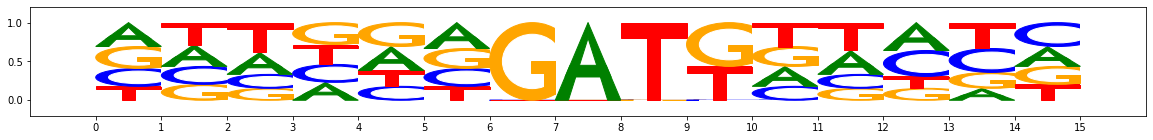

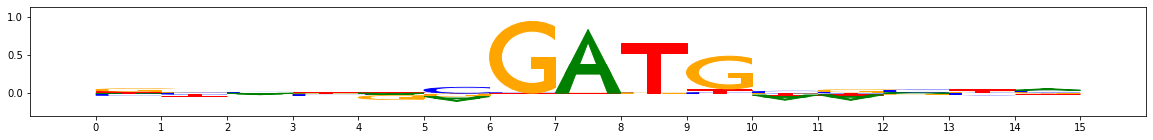

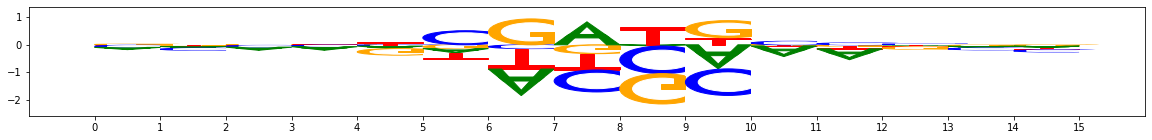

seqlets: 23


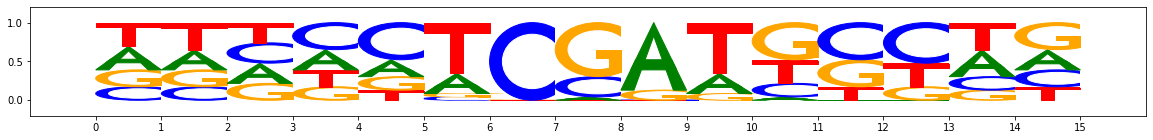

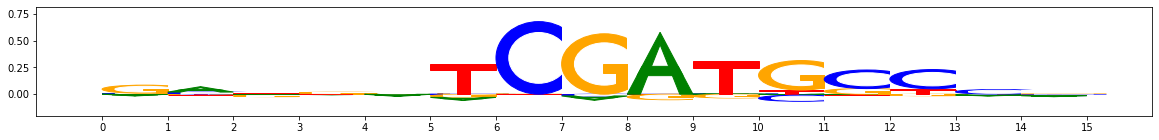

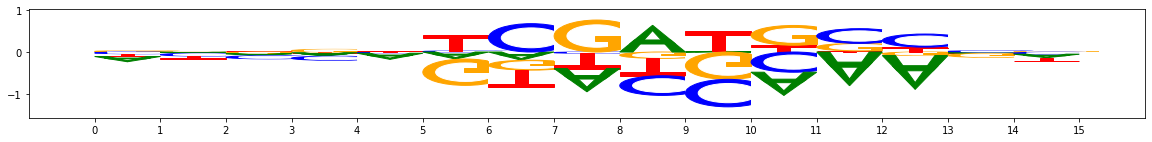

In [196]:
patterns = tfmodisco_results.metacluster_idx_to_submetacluster_results[0].seqlets_to_patterns_result.patterns

for patternidx,pattern in enumerate(patterns):
  print("seqlets:", len(pattern.seqlets))
  viz_sequence.plot_weights(pattern["sequence"].fwd)
  viz_sequence.plot_weights(pattern["task0_contrib_scores"].fwd)
  viz_sequence.plot_weights(pattern["task0_hypothetical_contribs"].fwd)


In [202]:
from modisco.core import SeqletCoordinates

#identify (centered) seqlet coordinates for each motif
seqlet_len = 15
pwm_seqlet_coords = [ [] for pwm in pwms]

for pwm_hits in bg2_pwm_to_hits:
    for pwm_hit in pwm_hits:
        if (pwm_hit.logodds_score > 2):
          pwm_len = pwm_hit.pwm_end - pwm_hit.pwm_start
          left_flank = int((seqlet_len - pwm_len)/2.0)
          seqlet_start = pwm_hit.pwm_start - left_flank
          seqlet_end = seqlet_start + seqlet_len
          if (seqlet_start >= 0) and (seqlet_end <= bg2_onehot_seqs.shape[1]):
            pwm_seqlet_coords[pwm_hit.which_pwm].append(
                SeqletCoordinates(example_idx=pwm_hit.seq_idx,
                                  start=seqlet_start, end=seqlet_end,
                                  is_revcomp=False))

#get the seqlets from the trackset object
track_set = modisco.tfmodisco_workflow.workflow.prep_track_set(
              task_names=["task0"], contrib_scores={"task0": bg2_actual_scores},
              hypothetical_contribs={"task0": bg2_hyp_scores},
              one_hot=bg2_onehot_seqs, revcomp=False)
pwm_seqlets = [track_set.create_seqlets(coords=coords)
               for coords in pwm_seqlet_coords]



In [218]:
print(sum([len(x) for x in pwm_seqlets]))
#do a stratified sampling
#num_per_pwm = np.array([200, 40, 200, 40, 150, 0, 0, 0])
num_per_pwm = np.array([150, 50])
assert len(num_per_pwm)==len(pwm_seqlets)

def subsample_list(the_list, num_to_sample):
    subsample_idxs = np.random.RandomState(1234).choice(
      a=np.arange(len(the_list)), replace=False,
      size=min(num_to_sample,len(the_list)) )
    subsamp_items = [the_list[i] for i in subsample_idxs]
    return subsamp_items

sub_seqlets = [x for (the_pwm_seqlets, num_to_sample)
                     in zip(pwm_seqlets, num_per_pwm)
                     for x in subsample_list(the_pwm_seqlets, num_to_sample) ]
sub_seqlets_whichpwms = np.array([pwm_idx for pwm_idx in range(len(num_per_pwm))
                                  for x in range(num_per_pwm[pwm_idx])])

#subsample to 2k

from collections import Counter
print(Counter(sub_seqlets_whichpwms))


397
Counter({0: 150, 1: 50})


In [219]:
# compute the pairwise sims using continjacc
def compute_pairwise_sims_continjacc(seqlets):
#    print("Num seqlets:", len(seqlets))
    #get the emebedding
    pattern_comparison_settings =(
        modisco.affinitymat.core.PatternComparisonSettings(                         
                    track_names=["task0_hypothetical_contribs",
                                "task0_contrib_scores"],                      
                    track_transformer=modisco.affinitymat.L1Normalizer(),                   
                    min_overlap=0.7))
    affmat_from_seqlets_with_nn_pairs =(
        modisco.affinitymat.core.AffmatFromSeqletsWithNNpairs(                      
            pattern_comparison_settings=pattern_comparison_settings,        
            sim_metric_on_nn_pairs=(
                modisco.affinitymat.core.ParallelCpuCrossMetricOnNNpairs(           
                    n_cores=10,                                   
                    cross_metric_single_region=                             
                        modisco.affinitymat.core.CrossContinJaccardSingleRegion()))))
    return affmat_from_seqlets_with_nn_pairs(seqlets=seqlets)


all_pairwise_sims = compute_pairwise_sims_continjacc(sub_seqlets)

nearest_neighbors = np.argsort(-all_pairwise_sims, axis=-1)
nn_pairwise_sims = np.array([ 
    row[nn] for row,nn in zip(all_pairwise_sims, nearest_neighbors) ])

Launching nearest neighbors affmat calculation job
MEMORY 2.222907392
Parallel runs completed
MEMORY 2.222923776
Job completed in: 1.32 s
MEMORY 2.222923776


In [220]:

def compute_pairwise_sims_crosscorr(seqlets):
#    print("Num seqlets:", len(seqlets))
    #get the emebedding
    pattern_comparison_settings =(
        modisco.affinitymat.core.PatternComparisonSettings(                         
                    track_names=["task0_hypothetical_contribs",
                                 "task0_contrib_scores"],                      
                    track_transformer=modisco.affinitymat.MagnitudeNormalizer(),                   
                    min_overlap=0.7))
    affmat_from_seqlets_with_nn_pairs =(
        modisco.affinitymat.core.AffmatFromSeqletsWithNNpairs(                      
            pattern_comparison_settings=pattern_comparison_settings,        
            sim_metric_on_nn_pairs=(
                modisco.affinitymat.core.ParallelCpuCrossMetricOnNNpairs(           
                    n_cores=10,                                   
                    cross_metric_single_region=                             
                        modisco.affinitymat.core.CrossCorrSingleRegion()))))
    return affmat_from_seqlets_with_nn_pairs(seqlets=seqlets)

all_pairwise_sims_crosscorr = compute_pairwise_sims_crosscorr(sub_seqlets)
nearest_neighbors_crosscorr = np.argsort(-all_pairwise_sims_crosscorr, axis=-1)
nn_pairwise_sims_crosscorr = np.array([ 
    row[nn] for row,nn in zip(all_pairwise_sims_crosscorr, nearest_neighbors_crosscorr) ])

Launching nearest neighbors affmat calculation job
MEMORY 2.222923776
Parallel runs completed
MEMORY 2.222854144
Job completed in: 0.83 s
MEMORY 2.222854144


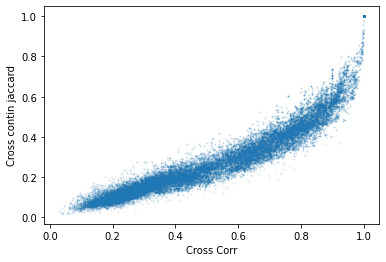

In [221]:
from matplotlib import pyplot as plt
plt.scatter(all_pairwise_sims_crosscorr.ravel(), all_pairwise_sims.ravel(), s=1, alpha=0.1)
plt.xlabel("Cross Corr")
plt.ylabel("Cross contin jaccard")
plt.show()

In [222]:
len(sub_seqlets)

200

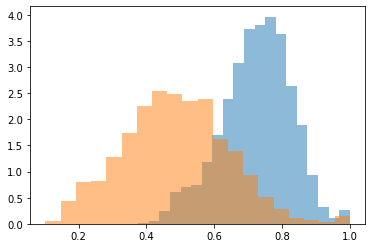

In [268]:
within_crosscontin0 = (all_pairwise_sims[sub_seqlets_whichpwms==0,:][:,sub_seqlets_whichpwms==0]).ravel()
within_crosscontin1 = (all_pairwise_sims[sub_seqlets_whichpwms==1,:][:,sub_seqlets_whichpwms==1]).ravel()
plt.hist(np.power(within_crosscontin0, 0.3), bins=20, alpha=0.5, density=True)
plt.hist(np.power(within_crosscontin0,0.7), bins=20, alpha=0.5, density=True)
#plt.hist(within_crosscontin1, bins=20, alpha=0.5, density=True)
plt.show()

Pwm 0 within v between - crosscontin
Within vs between auroc 0.9178821511111112


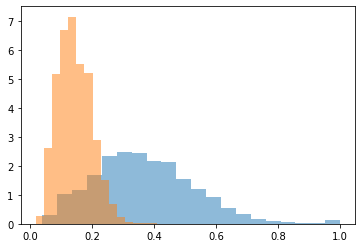

Pwm 0 within v between - crosscorr
Within vs between auroc 0.9246915081481482


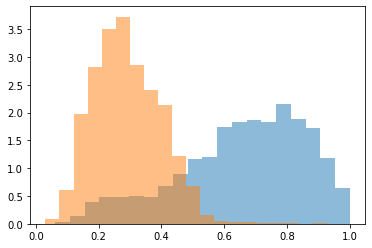

Pwm 1 within v between - crosscontin
Within vs between auroc 0.9142014933333333


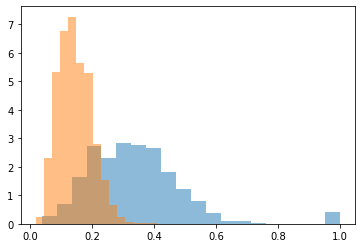

Pwm 1 within v between - crosscorr
Within vs between auroc 0.8876361599999999


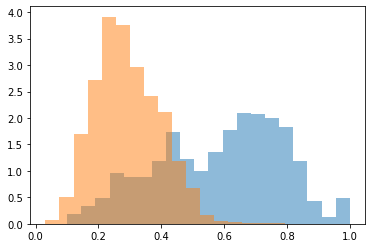

In [223]:
from matplotlib import pyplot as plt
import sklearn.metrics

#histogram within-cluster sims for different classes
for i in range(len(pwms)):
  print("Pwm",i,"within v between - crosscontin")
  within_crosscontin = (all_pairwise_sims[sub_seqlets_whichpwms==i,:][:,sub_seqlets_whichpwms==i]).ravel()
  between_crosscontin = (all_pairwise_sims[sub_seqlets_whichpwms==i,:][:,sub_seqlets_whichpwms!=i]).ravel()
  print("Within vs between auroc", sklearn.metrics.roc_auc_score(y_true=[1 for x in within_crosscontin]+[0 for x in between_crosscontin], y_score=list(within_crosscontin)+list(between_crosscontin)) )
  plt.hist(within_crosscontin, bins=20, alpha=0.5, density=True)
  plt.hist(between_crosscontin, bins=20, alpha=0.5, density=True)
  plt.show()
  print("Pwm",i,"within v between - crosscorr")
  within_crosscorr = (all_pairwise_sims_crosscorr[sub_seqlets_whichpwms==i,:][:,sub_seqlets_whichpwms==i]).ravel()
  between_crosscorr = (all_pairwise_sims_crosscorr[sub_seqlets_whichpwms==i,:][:,sub_seqlets_whichpwms!=i]).ravel()
  print("Within vs between auroc", sklearn.metrics.roc_auc_score(y_true=[1 for x in within_crosscorr]+[0 for x in between_crosscorr], y_score=list(within_crosscorr)+list(between_crosscorr)) )
  plt.hist(within_crosscorr, bins=20, alpha=0.5, density=True)
  plt.hist(between_crosscorr, bins=20, alpha=0.5, density=True)
  plt.show()

In [224]:
from matplotlib import pyplot as plt
import sklearn.manifold

# do the (two different) aff-to-dist mappings
# get t-sne emebdding, color points by ground-truth motif membership

PERPLEXITY = 10

invlogistic_distmat = modisco.affinitymat.AffToDistViaInvLogistic()(
                        all_pairwise_sims)
invlogistic_embedding = sklearn.manifold.TSNE(                             
                perplexity=PERPLEXITY,                                          
                metric='precomputed',                                           
                verbose=3, random_state=1234).fit_transform(invlogistic_distmat)

maxtomin_distmat = modisco.affinitymat.MaxToMin()(all_pairwise_sims)
maxtomin_embedding = sklearn.manifold.TSNE(                             
                perplexity=10,                                          
                metric='precomputed',                                           
                verbose=3, random_state=1234).fit_transform(maxtomin_distmat)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.001s...
[t-SNE] Computed neighbors for 200 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 0.317488
[t-SNE] Computed conditional probabilities in 0.006s
[t-SNE] Iteration 50: error = 70.7179718, gradient norm = 0.4786522 (50 iterations in 0.049s)
[t-SNE] Iteration 100: error = 70.1174622, gradient norm = 0.5091878 (50 iterations in 0.048s)
[t-SNE] Iteration 150: error = 72.7440262, gradient norm = 0.4892021 (50 iterations in 0.049s)
[t-SNE] Iteration 200: error = 71.5071106, gradient norm = 0.4523833 (50 iterations in 0.065s)
[t-SNE] Iteration 250: error = 71.9207611, gradient norm = 0.4668638 (50 iterations in 0.053s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.920761
[t-SNE] Iteration 300: error = 0.9585713, gradient norm = 0.0107331 (50 iterations in 0.059s)
[t-SNE] Iteration 350: error = 0.7676606, gradient norm = 0.0031053 (

Invlogisitc afftodist tsne


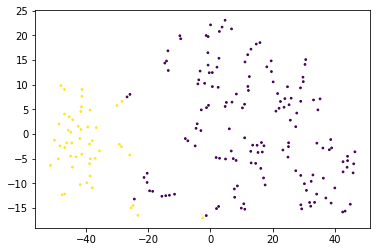

In [225]:
print("Invlogisitc afftodist tsne")
plt.scatter(invlogistic_embedding[:,0], invlogistic_embedding[:,1], s=3,
            c=sub_seqlets_whichpwms)
plt.show()

#print("1.0 minus afftodist tsne")      
#plt.scatter(maxtomin_embedding[:,0], maxtomin_embedding[:,1], s=3,
#            c=sub_seqlets_whichpwms)
#plt.show()

In [226]:
#run leiden on the unadapted sims
sym_seqlet_neighbors, sym_pairwise_sims_nn = modisco.util.symmetrize_nn_distmat(
    distmat_nn=nn_pairwise_sims, nn=nearest_neighbors,
    average_with_transpose=True)


In [227]:
clusterer = modisco.cluster.core.LeidenClusterParallel(
      n_jobs=10,                         
      affmat_transformer=
        modisco.affinitymat.transformers.AdhocAffMatTransformer(lambda x: x),            
      numseedstotry=50,                              
      n_leiden_iterations=-1,                
      verbose=True)
nodensadapted_leidenclusters = clusterer(
    modisco.util.coo_matrix_from_neighborsformat(
                    entries=sym_pairwise_sims_nn,
                    neighbors=sym_seqlet_neighbors,
                    ncols=len(sym_pairwise_sims_nn)).tocsr(),
    initclusters=None)

Beginning preprocessing + Leiden
Affmat shape: 200


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   13.5s


Quality: 0.11460383549687643
Quality: 0.11466104303991743
Quality: 0.11466902677032959


[Parallel(n_jobs=10)]: Done  50 out of  50 | elapsed:   17.5s finished


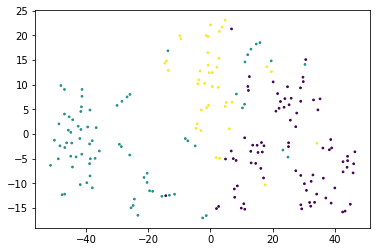

In [228]:
plt.scatter(invlogistic_embedding[:,0], invlogistic_embedding[:,1], s=3,
            c=nodensadapted_leidenclusters.cluster_indices)
plt.show()

In [229]:
import joblib

def do_density_adaptation(new_rows_distmat_nn, new_rows_nn,                 
                              new_rows_betas, new_rows_normfactors):            
    new_rows_densadapted_affmat_nn = []                                     
    for i in range(len(new_rows_distmat_nn)):                               
        densadapted_row = []                                                
        for j,distance in zip(new_rows_nn[i], new_rows_distmat_nn[i]):      
            densadapted_row.append(np.sqrt(                                 
              (np.exp(-distance/new_rows_betas[i])/new_rows_normfactors[i]) 
              *(np.exp(-distance/new_rows_betas[j])/                         
                new_rows_normfactors[j])))                                   
        new_rows_densadapted_affmat_nn.append(densadapted_row)              
    return new_rows_densadapted_affmat_nn


def get_density_embeddings(distmat_nn, seqlet_neighbors):
    sym_seqlet_neighbors, sym_distmat_nn = modisco.util.symmetrize_nn_distmat(  
                  distmat_nn=distmat_nn, nn=seqlet_neighbors,                     
                  average_with_transpose=True)
    #Compute beta values for the density adaptation. *store it*         
    betas_and_ps = joblib.Parallel(n_jobs=10)(     
            joblib.delayed(modisco.util.binary_search_perplexity)(PERPLEXITY, distances)
            for distances in sym_distmat_nn)
    betas = np.array([x[0] for x in betas_and_ps])
    #compute norm factors
    densadapted_affmat_nn_unnorm = [np.exp(-np.array(distmat_row)/beta)
        for distmat_row, beta in zip(sym_distmat_nn, betas)]
    normfactors = np.array([max(np.sum(x),1e-8) for x in
                            densadapted_affmat_nn_unnorm])
    #do the density adaptation
    sym_densadapted_affmat_nn = do_density_adaptation(
        new_rows_distmat_nn=sym_distmat_nn,
        new_rows_nn=sym_seqlet_neighbors,
        new_rows_betas=betas,
        new_rows_normfactors=normfactors)
    modisco.util.verify_symmetric_nn_affmat(
        affmat_nn=sym_densadapted_affmat_nn,
        nn=sym_seqlet_neighbors)
    csr_density_adapted_affmat =\
                modisco.util.coo_matrix_from_neighborsformat(
                    entries=sym_densadapted_affmat_nn,
                    neighbors=sym_seqlet_neighbors,
                    ncols=len(sym_densadapted_affmat_nn)).tocsr()

    return csr_density_adapted_affmat

#get density embeddings
nn_invlogistic_distmat = modisco.affinitymat.AffToDistViaInvLogistic()(nn_pairwise_sims)
invlogistic_csr_density_adapted_affmat = get_density_embeddings(
    distmat_nn=nn_invlogistic_distmat, seqlet_neighbors=nearest_neighbors)


Beginning preprocessing + Leiden
Affmat shape: 200


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    7.3s


Quality: 0.04389893630934224


[Parallel(n_jobs=10)]: Done  50 out of  50 | elapsed:   11.8s finished


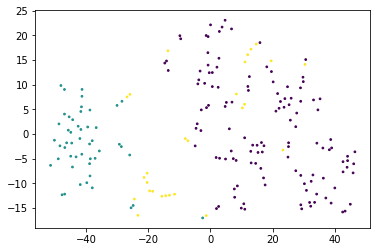

In [230]:
#run leiden on the adapted sims
densadapted_leidenclusters = clusterer(invlogistic_csr_density_adapted_affmat,
                                       initclusters=None)

plt.scatter(invlogistic_embedding[:,0], invlogistic_embedding[:,1], s=3,
            c=densadapted_leidenclusters.cluster_indices)
plt.show()

In [231]:
#run leiden on the adapted sims
nn_maxtomin_distmat = modisco.affinitymat.MaxToMin()(nn_pairwise_sims)
maxtomin_csr_density_adapted_affmat = get_density_embeddings(
    distmat_nn=nn_maxtomin_distmat, seqlet_neighbors=nearest_neighbors)

maxtomin_densadapted_leidenclusters = clusterer(maxtomin_csr_density_adapted_affmat,
                                       initclusters=None)



Beginning preprocessing + Leiden
Affmat shape: 200


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    7.8s


Quality: 0.0038452556350181935
Quality: 0.003847501800831612


[Parallel(n_jobs=10)]: Done  50 out of  50 | elapsed:   12.3s finished


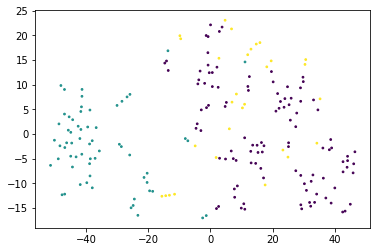

In [232]:
plt.scatter(invlogistic_embedding[:,0], invlogistic_embedding[:,1], s=3,
            c=maxtomin_densadapted_leidenclusters.cluster_indices)
plt.show()

Install MEME

In [241]:
!wget http://meme-suite.org/meme-software/5.1.1/meme-5.1.1.tar.gz
!tar zxf meme-5.1.1.tar.gz
%cd meme-5.1.1

#Ghostscript dependency
!apt-get install -y ghostscript-x

#Perl module dependencies
!echo $PERL5LIB
%set_env PERL5LIB=$HOME/perl5/lib/perl5:$PERL5LIB
!echo $PERL5LIB
!curl -L http://cpanmin.us | perl - File::Which
!curl -L http://cpanmin.us | perl - HTML::PullParser
!curl -L http://cpanmin.us | perl - HTML::Template
!curl -L http://cpanmin.us | perl - HTML::TreeBuilder
!curl -L http://cpanmin.us | perl - JSON
!curl -L http://cpanmin.us | perl - XML::Simple
!curl -L http://cpanmin.us | perl - XML::Parser::Expat
!perl scripts/dependencies.pl #as a sanity check, print out missing dependencies

#install MEME
!make clean
!./configure --prefix=/content/meme --with-url=http://alternate.meme-suite.org/ --enable-serial --enable-build-libxml2 --enable-build-libxslt
!make
#meme-chip test fails with python 3 (seems to be a bug):
# https://groups.google.com/forum/#!topic/meme-suite/D3XR7Ws1gec
#thus, won't run the tests
#!make test
!make install

import os
os.environ['PATH'] = "/content/meme/bin:"+os.environ['PATH']
%cd ..

--2021-10-14 04:25:47--  http://meme-suite.org/meme-software/5.1.1/meme-5.1.1.tar.gz
Resolving meme-suite.org (meme-suite.org)... 128.208.8.135
Connecting to meme-suite.org (meme-suite.org)|128.208.8.135|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://meme-suite.org/meme-software/5.1.1/meme-5.1.1.tar.gz [following]
--2021-10-14 04:25:48--  https://meme-suite.org/meme-software/5.1.1/meme-5.1.1.tar.gz
Connecting to meme-suite.org (meme-suite.org)|128.208.8.135|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://meme-suite.org/meme/meme-software/5.1.1/meme-5.1.1.tar.gz [following]
--2021-10-14 04:25:48--  https://meme-suite.org/meme/meme-software/5.1.1/meme-5.1.1.tar.gz
Reusing existing connection to meme-suite.org:443.
HTTP request sent, awaiting response... 200 200
Length: 46199283 (44M) [application/x-gzip]
Saving to: ‘meme-5.1.1.tar.gz’

meme-5.1.1.tar.gz   100%[===================>]  44.06M  28.9MB/s

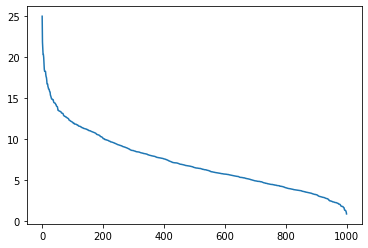

In [242]:
#Write out sequences to look for differential enrichment
bg1_output = np.sum(bg1_actual_scores, axis=(1,2))
bg1_descending_output_sort = np.argsort(-bg1_output)
plt.plot(bg1_output[bg1_descending_output_sort])
plt.show()
with open("bg1_upperhalf.txt",'w') as f:
  f.write("\n".join([">seq"+str(i)+"\n"+bgdata1.sequences[i] for i in bg1_descending_output_sort[:int(len(bg1_output)/2)]]))
with open("bg1_lowerhalf.txt",'w') as f:
  f.write("\n".join([">seq"+str(i)+"\n"+bgdata1.sequences[i] for i in bg1_descending_output_sort[int(len(bg1_output)/2):]]))

In [243]:
#launch MEME
!meme bg1_upperhalf.txt -dna -oc . -nostatus -time 14400 -mod anr -nmotifs 3 -minw 4 -maxw 8 -objfun de -neg bg1_lowerhalf.txt -markov_order 0

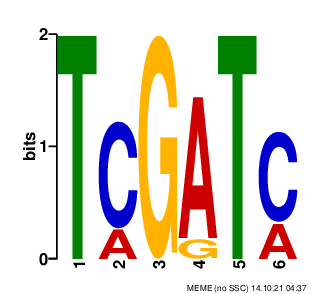

In [273]:
from IPython.display import Image
Image(filename='logo1.png') 


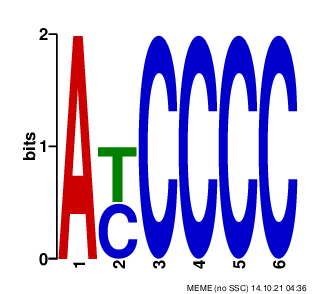

In [274]:
Image(filename='logo2.png')

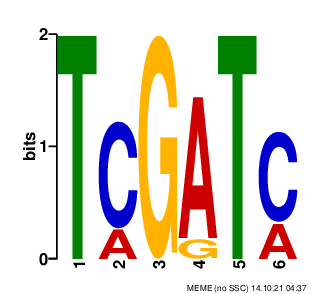

In [275]:

Image(filename='logo3.png')  